In [1]:
from transformers import LlavaNextProcessor, LlavaNextForConditionalGeneration
import torch
from PIL import Image
import requests
import time
import numpy as np
from helper import *

/home/hasan/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Initialize processor and model
processor = LlavaNextProcessor.from_pretrained("llava-hf/llava-v1.6-mistral-7b-hf")
model = LlavaNextForConditionalGeneration.from_pretrained("llava-hf/llava-v1.6-mistral-7b-hf", torch_dtype=torch.float16, low_cpu_mem_usage=True).to("cuda:0")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Loading checkpoint shards: 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]


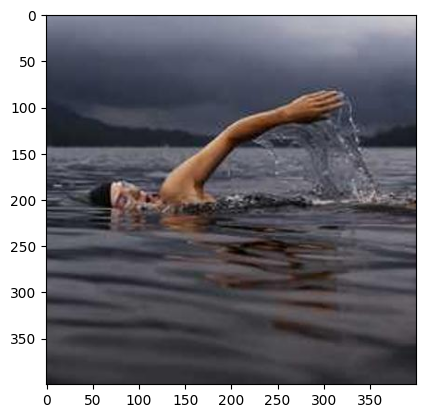

In [88]:
model.config.fast_vlm_config = {
    "spatial_budget": 0,
    "alpha_vision_token_budget": 0.2,
    "beta_sub_images_budget": 0.5,
    "clip_attn_layer": 22,
}

# Prepare image and text prompt
image = get_random_image(h=400,w=400,show=True)
# image = Image.open("../billboard.jpg")
prompt = "[INST] <image>\nWhat is shown in this image? [/INST]"
inputs = processor(prompt, image, return_tensors="pt").to("cuda:0")


In [89]:
image_size = inputs.image_sizes[0]

In [90]:
with torch.inference_mode():
    output = model.generate(**inputs, do_sample=False, output_attentions=False, return_dict=True)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
/home/hasan/kvto_vlm/transformers/src/transformers/generation/utils.py:1244: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


number of features: torch.Size([576, 4096])


In [91]:
kvto_mask = model.kvto_mask[0].detach().cpu().numpy()

### testing

In [92]:
num_patches = kvto_mask.shape[0]

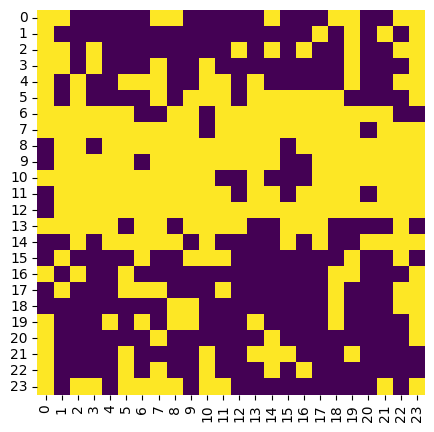

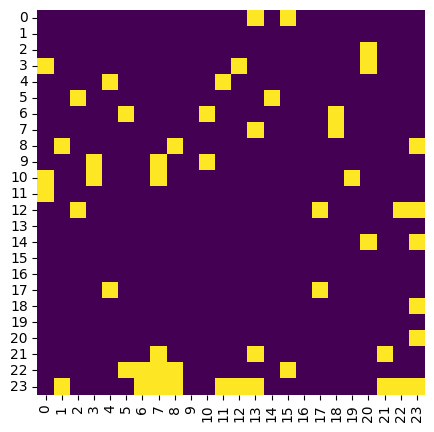

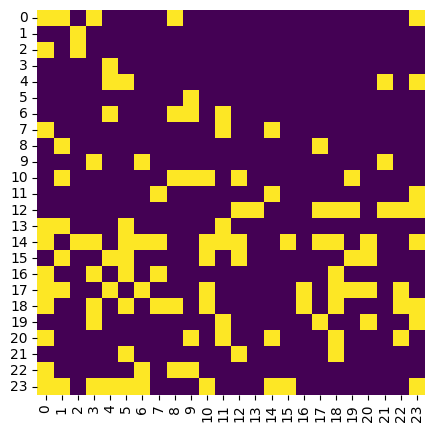

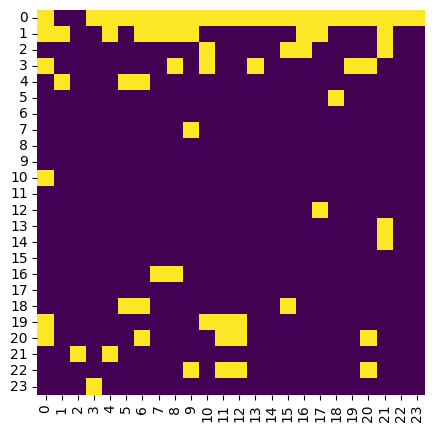

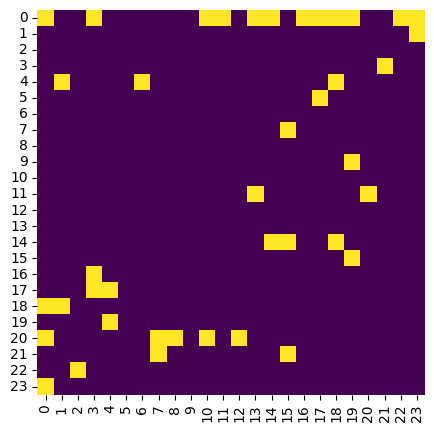

In [93]:
for i in range(num_patches):
    plot_attentin_map_in_nxn_grid(kvto_mask[i])